Reasearch - Nguyen Hung Anh (Robert Nguyen)

-------------------------------------------


In [36]:
# Importing various libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns

In [37]:
# Read Data Set
df = pd.read_csv('Centre_v_Emory.csv')

In [38]:
# Exploratory Data Analysis
df.head()

,Clock,Away Play,Visiting Team Score,Team Logo,Home Team Score,Home Play,Score,Team Indicator,Play,Period
0,0:00,Jonelle Barron at goalie for Centre College.,NaN,NaN,NaN,NaN,NaN,NaN,Jonelle Barron at goalie for Centre College.,1
1,0:00,NaN,NaN,NaN,NaN,Haley Pratt at goalie for Emory University.,NaN,NaN,Haley Pratt at goalie for Emory University.,1
2,3:06,NaN,NaN,NaN,NaN,Corner kick by Emory University Shivani Beall ...,NaN,NaN,Corner kick by Emory University Shivani Beall ...,1
3,6:07,NaN,NaN,NaN,NaN,"Shot by Emory University Shivani Beall, Wide.",NaN,NaN,"Shot by Emory University Shivani Beall, Wide.",1
4,--,Foul on Centre College.,NaN,NaN,NaN,NaN,NaN,NaN,Foul on Centre College.,1


In [39]:
#Renaming the columns
df.rename(columns={'Home Play': 'CEN - Play Description', 'Away Play': 'EUW - Play Description'}, inplace = True)

#Droping unnecessary columns
columns_to_drop = ['Team Logo', 'Team Indicator', 'Period']
df.drop(columns_to_drop, axis = 1, inplace = True)

#Saving the modified DataFrame to a new CSV file
#Why do I need to save a new CSV when I use inplace = TRUE?
df.to_csv('Modified_Centre_v_Emory.csv', index = False)
print("CSV file has been modified and saved as 'Modified_Centre_v_Emory.csv'")

CSV file has been modified and saved as 'Modified_Centre_v_Emory.csv'


In [51]:
#Taking the highest number of goals scored for both teams
#df.max() Auto exclude NA/null values when computing the result.
i_maximum_of_goals_visiting = df["Visiting Team Score"].max()
i_maximum_of_goals_home = df["Home Team Score"].max()

#Finding the index of those highest number of goals
i_maxindex_visiting = df['Visiting Team Score'].idxmax()
i_maxindex_home = df['Home Team Score'].idxmax()

#Replacing all the values after the maximum goals scored by the home team
df.loc[i_maxindex_visiting + 1:, "Visiting Team Score"] = df.loc[i_maxindex_visiting, "Visiting Team Score"]
df.loc[i_maxindex_home + 1:, "Home Team Score"] = df.loc[i_maxindex_home, "Home Team Score"]

#Finding the index of the row where first goal was scored by the visiting team and by the home team
first_goal_index_visiting = df[(df['Visiting Team Score'].notna()) & (df['Visiting Team Score'] > 0)].index[0]
#first_goal_index_home = df[(df['Home Team Score'].notna()) & (df['Home Team Score'] > 0)].index[0]

#Filling all missing values in the Home Team Score and Visiting Team Score columns up to the first goal with 0
df.loc[:first_goal_index_visiting, 'Visiting Team Score'].fillna(0, inplace = True)
df.loc[:first_goal_index_home, 'Home Team Score'].fillna(0, inplace = True)

#Finding the time for the first goal in the match.
first_goal_minute = df.loc[df['CEN - Play Description'].str.contains('GOAL|own goal', na=False) | df['EUW - Play Description'].str.contains('GOAL|own goal', na=False), 'Clock'].min()

#Finding which side scored at the first goal minute
if df.loc[df['Clock'] == first_goal_minute, 'CEN - Play Description'].str.contains('GOAL|own goal', na=False).any():
  print("Centre scored first in minute", first_goal_minute)
elif df.loc[df['Clock'] == first_goal_minute, 'EUW - Play Description'].str.contains('GOAL|own goal', na=False).any():
  print("Emory scored first in minute", first_goal_minute)
else:
  print("No goal was scored.")

KeyError: 'Visiting Team Score'

In [41]:
#Finding number of corner kicks for both teams
centre_corners_count = df['CEN - Play Description'].str.contains('Corner kicks').sum()
emory_corners_count = df['EUW - Play Description'].str.contains('Corner kicks').sum()
print(f"Centre had {centre_corners_count} corner kicks in the whole game.")
print(f"Emory had {emory_corners_count} corners kicks in the whole game.")

Centre had 0 corner kicks in the whole game.
Emory had 0 corners kicks in the whole game.


In [42]:
#Finding the number of substitutions that both teams made during the game
centre_subs_count = df['CEN - Play Description'].str.contains('CEN subsitutions', case = False).sum()
emory_subs_count = df['EUW - Play Description'].str.contains('EUW substitutions', case = False).sum()

#Calculating the different of subs for both teams
difference = abs(centre_subs_count - emory_subs_count)

#Checking which team had more subs.
if centre_subs_count > emory_corners_count:
  print(f"In the whole game, Centre made the most substitutions with {centre_subs_count} substitutions.")
  print(f"Emory made {emory_subs_count} substitutions.")
  print(f"Centre made {difference} more substitutions than Emory.")
elif emory_subs_count > centre_corners_count:
  print(f"In the whole game, Emory made the most substitutions with {emory_subs_count} substitutions.")
  print(f"Centre made {centre_subs_count} substitutions.")
  print(f"Emory made {difference} more substitutions than Centre.")
else:
  print(f"In the whole game, both teams made the same number of substitutions with {centre_subs_count} substitutions each.")

In the whole game, both teams made the same number of substitutions with 0 substitutions each.


In [43]:
#Finding the number of shots made by both teams during the whole match
centre_shots_count = df['Play'].str.contains('Shot by CEN', case = False).sum()
emory_shots_count = df['Play'].str.contains('Shot by EUW', case = False).sum()

#Calculating total shots in the whole game
total_shots_count = centre_shots_count + emory_shots_count
print(f"Centre had {centre_shots_count} shots and Emory had {emory_shots_count} shots for a total of {total_shots_count} in the whole match.")

#Checking percentage for both teams
if centre_shots_count > 0:
  centre_percentage = round((centre_shots_count/total_shots_count) * 100, 2)
  print(f"Centre had {centre_percentage}% of the shots.")
else:
  print("Centre did not make any shots in the whole match.")

if emory_shots_count > 0:
  emory_percentage = round((emory_shots_count/total_shots_count) * 100, 2)
  print(f"Emory had {emory_percentage}% of the shots.")
else:
  print("Emory did not make any shots in the whole match.")

Centre had 11 shots and Emory had 0 shots for a total of 11 in the whole match.
Centre had 100.0% of the shots.
Emory did not make any shots in the whole match.


In [44]:
#Find the number of fouls committed by both teams
centre_fouls_count = df['CEN - Play Description'].str.contains('foul', case = False).sum()
emory_fouls_count = df['EUW - Play Description'].str.contains('foul', case = False).sum()

#Calculating total fouls for the whole game
total_fouls_count = centre_fouls_count + emory_fouls_count
print(f"Centre committed {centre_fouls_count} fouls and Emory committed {emory_fouls_count} fouls for a total of {total_fouls_count} fouls in the whole match.")

#Checking which team committed more fouls
if centre_fouls_count > emory_fouls_count:
  print(f"Centre committed more fouls than Emory by {centre_fouls_count - emory_fouls_count} fouls.")
elif emory_fouls_count > centre_fouls_count:
  print(f"Emory committed more fouls than Centre by {emory_fouls_count - centre_fouls_count} fouls.")
else:
  print(f"Centre and Emory committed the same number of fouls which are {centre_fouls_count} fouls in the whole game.")

Centre committed 9 fouls and Emory committed 11 fouls for a total of 20 fouls in the whole match.
Emory committed more fouls than Centre by 2 fouls.


In [45]:
#Counting the number of yellow cards for both teams
centre_y_cards_count = df['CEN - Play Description'].str.contains('Yellow card', case = False).sum()
emory_y_cards_count = df['EUW - Play Description'].str.contains('Yellow card', case = False).sum()
print(f"Centre received {centre_y_cards_count} yellow cards.")
print(f"Emory received {emory_y_cards_count} yellow cards.")

#Determining which team received more yellow cards
if centre_y_cards_count > emory_y_cards_count:
  print(f"Centre received more yellow cards than Emory by {centre_y_cards_count - emory_y_cards_count} yellow cards.")
elif emory_y_cards_count > centre_y_cards_count:
  print(f"Emory received more yellow cards than Centre by {emory_y_cards_count - emory_y_cards_count} yellow cards.")
else:
  print(f"Centre and Emory received the same number of yellow cards, which are {centre_y_cards_count} yellow cards")

#Counting the number of red cards for both teams
centre_r_cards_count = df['CEN - Play Description'].str.contains('Red card on CEN', case = False).sum()
emory_r_cards_count = df['EUW - Play Description'].str.contains('Red card on EUW', case = False).sum()
print(f"Centre received {centre_r_cards_count} red cards.")
print(f"Emory received {emory_r_cards_count} red cards.")

#Determining which team received more red cards
if centre_r_cards_count > emory_r_cards_count:
  print(f"Centre received more red cards than Emory by {centre_r_cards_count - emory_r_cards_count} red cards.")
elif emory_y_cards_count > centre_y_cards_count:
  print(f"Emory received more red cards than Centre by {emory_r_cards_count - emory_r_cards_count} red cards.")
else:
  print(f"Centre and Emory received the same number of red cards, which are {centre_r_cards_count} red cards.")

Centre received 0 yellow cards.
Emory received 0 yellow cards.
Centre and Emory received the same number of yellow cards, which are 0 yellow cards
Centre received 0 red cards.
Emory received 0 red cards.
Centre and Emory received the same number of red cards, which are 0 red cards.


In [46]:
#Finding the number of offsides against both teams
centre_offsides_count = df['CEN - Play Description'].str.contains('Offside', case = False).sum()
emory_offsides_count = df['EUW - Play Description'].str.contains('Offside', case = False).sum()
print(f"Centre had {centre_offsides_count} offsides called against them.")
print(f"Emory had {emory_offsides_count} offsides called against them.")

#Checking which team had more offsides
if centre_offsides_count > emory_offsides_count:
  print(f"Centre had more offsides called against them than Emory by {centre_offsides_count - emory_offsides_count}.")
elif emory_offsides_count > centre_offsides_count:
  print(f"Emory had more offsides called against them than Centre by {emory_offsides_count - centre_offsides_count}.")
else:
  print(f"Centre and Emory had the same number of offsides call against them, which are {centre_offsides_count} offsides.")

Centre had 2 offsides called against them.
Emory had 1 offsides called against them.
Centre had more offsides called against them than Emory by 1.


In [47]:
#GAME STATISTICS

#Calculating the number of corner kicks
centre_corners_count = df['CEN - Play Description'].str.contains('Corner kick', case = False).sum()
emory_corners_count = df['EUW - Play Description'].str.contains('Corner kick', case = False).sum()

#Calculating the number of substitutions
centre_subs_count = df['CEN - Play Description'].str.contains('CEN substitution', case = False).sum()
emory_subs_count = df['EUW - Play Description'].str.contains('EUW substitution', case = False).sum()

#Calculating the number of shots
centre_shots_count = df['Play'].str.contains('Shot by CEN', case = False).sum()
emory_shots_count = df['Play'].str.contains('Shot by EUW', case = False).sum()

#Calculating the number of fouls
centre_fouls_count = df['CEN - Play Description'].str.contains('foul', case = False).sum()
emory_fouls_count = df['EUW - Play Description'].str.contains('foul', case = False).sum()

#Calculating the number of yellow cards
centre_y_cards_count = df['CEN - Play Description'].str.contains('Yellow card', case = False).sum()
emory_y_cards_count = df['EUW - Play Description'].str.contains('Yellow card', case = False).sum()

#Calculating the number of red cards
centre_r_cards_count = df['CEN - Play Description'].str.contains('Red card on CEN', case = False).sum()
emory_r_cards_count = df['EUW - Play Description'].str.contains('Red card on EUW', case = False).sum()

#Calculating the number of offsides
centre_offsides_count = df['CEN - Play Description'].str.contains('Offside', case = False).sum()
emory_offsides_count = df['EUW - Play Description'].str.contains('Offside', case = False).sum()

#Printing the results for GAME STATISTICS
print("GAME STATISTICS:")
print(f"Centre had {centre_corners_count} corner kicks, {centre_subs_count} substitutions, {centre_shots_count} shots, {centre_fouls_count} fouls, {centre_y_cards_count} yellow cards, {centre_r_cards_count} red cards, and {centre_offsides_count} offsides.")
print(f"Emory had {emory_corners_count} corner kicks, {emory_subs_count} substitutions, {emory_shots_count} shots, {emory_fouls_count} fouls, {emory_y_cards_count} yellow cards, {emory_r_cards_count} red cards, and {emory_offsides_count} offsides.")

#Determining which team had more of each type of statistics
if centre_corners_count > emory_corners_count:
  print(f"Centre had more corner kicks than Emory by {centre_corners_count - emory_corners_count} corner kicks.")
elif emory_corners_count > centre_corners_count:
  print(f"Emory had more corner kicks than Centre by {emory_corners_count - centre_corners_count} corner kicks.")
else: 
  print(f"Centre and Emory had the same number of corner kicsk {centre_corners_count}.")

if centre_subs_count > emory_subs_count:
  print(f"Centre made more substitutions than Emory by {centre_subs_count - emory_subs_count} substitutions.")
elif emory_subs_count > centre_subs_count:
  print(f"Emory made more substitutions than Centre by {emory_subs_count - centre_subs_count} substitutions.")
else:
  print(f"Centre and Emory made the same number of substitutions, which are {centre_subs_count} substitutions.")

if centre_shots_count > emory_shots_count:
  print(f"Centre had more shots than Emory by {centre_shots_count - emory_shots_count} shots.")
elif emory_shots_count > centre_shots_count:
  print(f"Emory had more shots than Centre by {emory_shots_count - centre_shots_count} shots.")
else:
  print(f"Centre and Emory had the same number of shots, which are {centre_shots_count} shots.")

if centre_fouls_count > emory_fouls_count:
  print(f"Centre committed more fouls than Emory by {centre_fouls_count - emory_fouls_count} fouls.")
elif emory_fouls_count > centre_fouls_count:
  print(f"Emory committed more fouls than Centre by {emory_fouls_count - centre_fouls_count} fouls.")
else:
  print(f"Centre and Emory committed the same number of fouls, which are {centre_fouls_count} fouls.")

if centre_y_cards_count > emory_y_cards_count:
  print(f"Centre received more yellow cards than Emory by {centre_y_cards_count - emory_y_cards_count} yellow cards.")
elif emory_y_cards_count > centre_y_cards_count:
  print(f"Emory received more yellow cards than Centre by {emory_y_cards_count - centre_y_cards_count} yellow cards.")
else:
  print(f"Centre and Emory received the same number of yellow cards, which are {centre_y_cards_count}.")

if centre_r_cards_count > emory_r_cards_count:
  print(f"Centre received more red cards than Emory by {centre_y_cards_count - emory_r_cards_count} red cards.")
elif emory_r_cards_count > centre_r_cards_count:
  print(f"Emory received more red cards than Centre by {emory_r_cards_count - centre_r_cards_count} red cards.")
else:
  print(f"Centre and Emory received the same number of red cards, which are {centre_r_cards_count}.")

if centre_offsides_count > emory_offsides_count:
  print(f"Centre had more offsides than Emory by {centre_offsides_count - emory_offsides_count} offsides.")
elif emory_offsides_count > centre_offsides_count:
  print(f"Emory had more offsides than Centre by {emory_offsides_count - centre_offsides_count} offsides.")
else:
  print(f"Centre and Emory had the same number of offsides, which are {centre_offsides_count}.")

GAME STATISTICS:
Centre had 1 corner kicks, 0 substitutions, 11 shots, 9 fouls, 0 yellow cards, 0 red cards, and 2 offsides.
Emory had 3 corner kicks, 0 substitutions, 0 shots, 11 fouls, 0 yellow cards, 0 red cards, and 1 offsides.
Emory had more corner kicks than Centre by 2 corner kicks.
Centre and Emory made the same number of substitutions, which are 0 substitutions.
Centre had more shots than Emory by 11 shots.
Emory committed more fouls than Centre by 2 fouls.
Centre and Emory received the same number of yellow cards, which are 0.
Centre and Emory received the same number of red cards, which are 0.
Centre had more offsides than Emory by 1 offsides.


In [48]:
#Calculating the total number of each type of statistics for both teams.
total_corners_count = centre_corners_count + emory_corners_count
total_subs_count = centre_subs_count + emory_subs_count
total_shots_count = centre_shots_count + emory_shots_count
total_fouls_count = centre_fouls_count + emory_fouls_count
total_y_cards_count = centre_y_cards_count + emory_y_cards_count
total_r_cards_count = centre_r_cards_count + emory_r_cards_count
total_offsides_count = centre_offsides_count + emory_offsides_count

#Calculating percentage for each team 
def calculate_percentage(part, whole):
  if whole == 0:
    return 0
  else:
    return (part / whole) * 100

#Calculating the percentage of each statistics for Centre
centre_corners_per = calculate_percentage(centre_corners_count, total_corners_count)
centre_subs_per = calculate_percentage(centre_subs_count, total_subs_count)
centre_shots_per = calculate_percentage(centre_shots_count, total_shots_count)
centre_fouls_per = calculate_percentage(centre_fouls_count, total_fouls_count)
centre_y_cards_per = calculate_percentage(centre_y_cards_count, total_y_cards_count)
centre_r_cards_per = calculate_percentage(centre_r_cards_count, total_r_cards_count)
centre_offsides_per = calculate_percentage(centre_offsides_count, total_offsides_count)

#Calculating the percentage of each statistis for Emory
emory_corners_per = calculate_percentage(emory_corners_count, total_corners_count)
emory_subs_per = calculate_percentage(emory_subs_count, total_subs_count)
emory_shots_per = calculate_percentage(emory_shots_count, total_shots_count)
emory_fouls_per = calculate_percentage(emory_fouls_count, total_fouls_count)
emory_y_cards_per = calculate_percentage(emory_y_cards_count, total_y_cards_count)
emory_r_cards_per = calculate_percentage(emory_r_cards_count, total_r_cards_count)
emory_offsides_per = calculate_percentage(emory_offsides_count, total_offsides_count)

#Priting results using dictionary
fullgame_data = {
  'Statistics' : ['Corner kicks', 'Substitutions', 'Shots', 'Fouls', 'Yellow cards', 'Red cards', 'Offsides'],
  'CEN Count' : [centre_corners_count, centre_subs_count, centre_shots_count, centre_fouls_count, centre_y_cards_count, centre_r_cards_count, centre_offsides_count],
  'CEN Percentage' : [centre_corners_per, centre_subs_per, centre_shots_per, centre_fouls_per, centre_y_cards_per, centre_r_cards_per, centre_offsides_per],
  'EUW Count' : [emory_corners_count, emory_subs_count, emory_shots_count, emory_fouls_count, emory_y_cards_count, emory_r_cards_count, emory_offsides_count],
  'EUW Percentage' : [emory_corners_per, emory_subs_per, emory_shots_per, emory_fouls_per, emory_y_cards_per, emory_r_cards_per, emory_offsides_per],
}

#Creating DataFrame from dictionary
df = pd.DataFrame(fullgame_data)
print(df)

      Statistics  CEN Count  CEN Percentage  EUW Count  EUW Percentage
0   Corner kicks          1       25.000000          3       75.000000
1  Substitutions          0        0.000000          0        0.000000
2          Shots         11      100.000000          0        0.000000
3          Fouls          9       45.000000         11       55.000000
4   Yellow cards          0        0.000000          0        0.000000
5      Red cards          0        0.000000          0        0.000000
6       Offsides          2       66.666667          1       33.333333


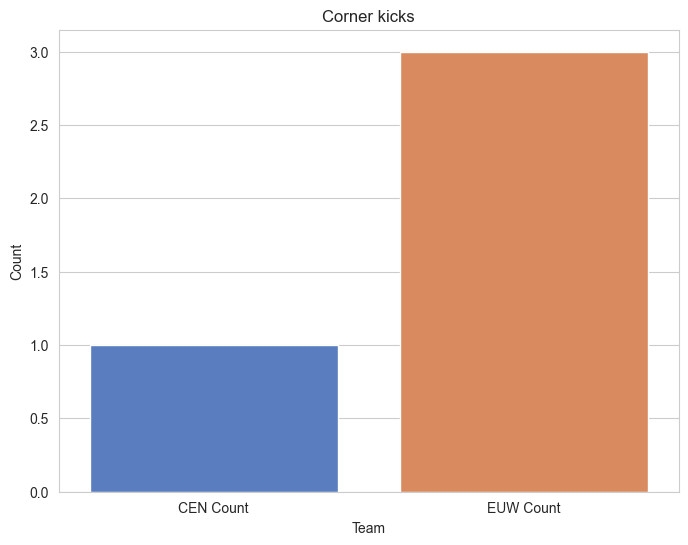

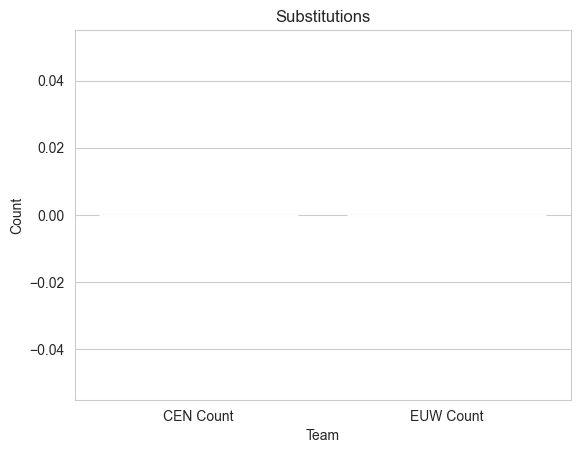

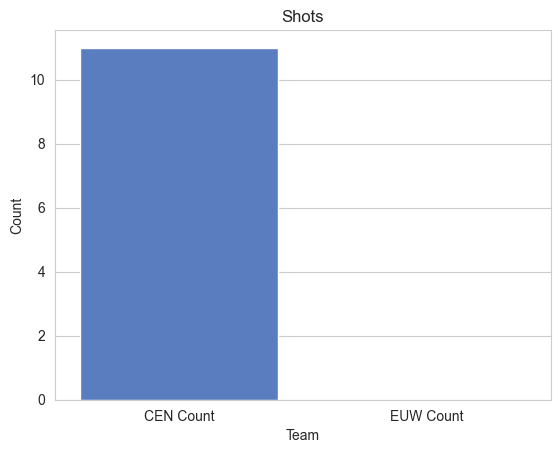

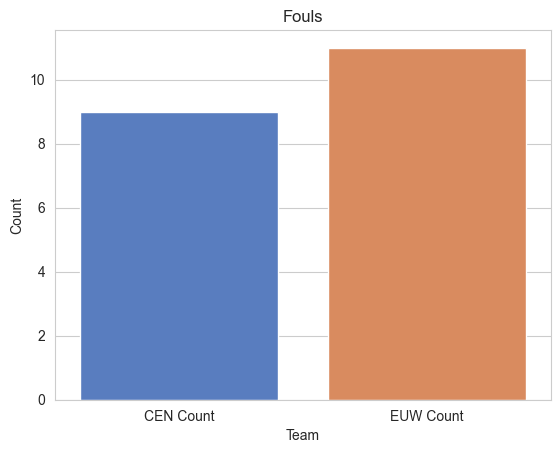

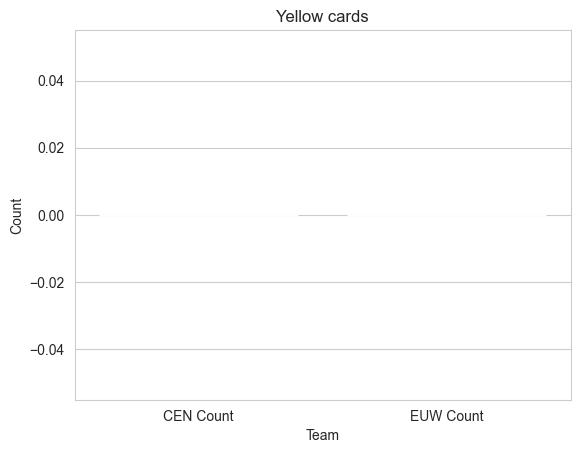

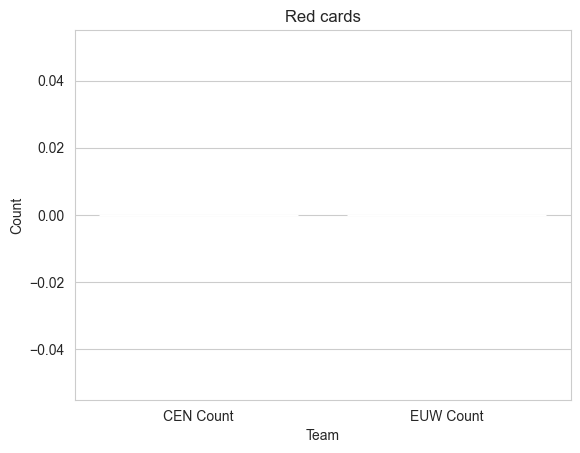

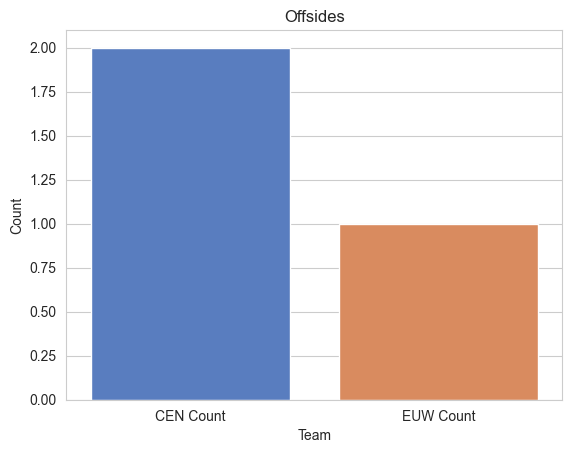

In [49]:
#Creating dictionary with data
fullgame_data = {k:v for k,v in fullgame_data.items() if 'Percentage' not in k}
df = pd.DataFrame(fullgame_data)

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))

#Loop over each statistic
for stat in df['Statistics']:
  df_stat = df[df['Statistics'] == stat].melt(id_vars = 'Statistics', var_name = 'Team', value_name = 'Count')
  sns.barplot(x='Team', y='Count', data=df_stat, hue='Team', palette='muted')
  plt.title(stat)
  plt.ylabel('Count')
  plt.show()

<Axes: ylabel='Statistics'>

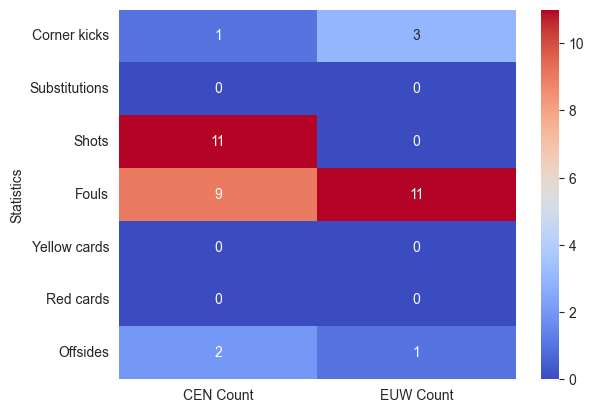

In [50]:
#Creating heatmap data
heatmap_data = df[['Statistics', 'CEN Count', 'EUW Count']].set_index('Statistics')
sns.heatmap(heatmap_data, annot = True, cmap = 'coolwarm')